In [29]:
import tensorflow as tf
import numpy as np

from pinn import PINNModel, model1
# from accuracy import AccuracyCalc
from plotting import NNPlots
from data_gen import DataGenerator

In [30]:
def real_u(area):
    area = np.array(area)
    if len(area.shape) >= 3:
        x = area[0]
        y = area[1]
        return np.sin(np.pi * x) * np.sin(np.pi * y)
    else:
        return np.array([np.sin(np.pi * x) * np.sin(np.pi * y)  for x, y in area])

In [31]:
# force gpu use
gpus = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_visible_devices(gpus[0], 'GPU')

In [32]:
area_grid_size = (50, 50)
x_limits = (0, 2)
y_limits = (0, 2)
border_grid_size = (50, 50)
plotting_grid_size = (200, 200)

EPOCHS = 12000
EPRINT = 500
LOSS = 1e-3 # 1e-4

model = PINNModel(model1(), optm = tf.keras.optimizers.Adam(learning_rate=0.001))

dataGen = DataGenerator(x_limits, y_limits, model.predict, real_u)

# info = Task(model.predict, real_u, (x_limits, y_limits), area_grid_size, border_grid_size)

In [33]:
model.load_weights("../models/model0.weights.h5")
model.train(1, dataGen.inner_pairs(area_grid_size), dataGen.border_pairs(border_grid_size), EPOCHS, LOSS, EPRINT)
model.save("../models/model0.weights.h5")

epoch: 0 loss: 0.0109696966
epoch: 500 loss: 0.00157001941
epoch: 1000 loss: 0.0014875246
epoch: 1500 loss: 0.00146925356
epoch: 2000 loss: 0.00298763462
epoch: 2500 loss: 0.00185790518
epoch: 3000 loss: 0.00560779683
epoch: 3500 loss: 0.00137894601
epoch: 4000 loss: 0.001056851
epoch: 4500 loss: 0.00266469456
epoch: 5000 loss: 0.00192503119
epoch: 5500 loss: 0.00387188303
epoch: 6000 loss: 0.00197413
epoch: 6500 loss: 0.000877892133


In [34]:
# pred_coord = list()
# for _x in x[0]:
#     for _y in x[0]:
#         pred_coord.append([_x, _y])
# pred_u = model.predict(np.array(pred_coord)).ravel().reshape(plotting_grid_size[0], plotting_grid_size[1])
# print("Error:", AccuracyCalc.mse(info.accuracy_info()))
# print("Error:", AccuracyCalc.maxe(info.accuracy_info()))

In [35]:
# plotter = NNPlots((x_limits, y_limits), area_grid_size, model.predict, real_u, info._predict_val)
plotter = NNPlots(dataGen, (200, 200))

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 616us/step


/home/arnautov/projectPractice/pinn_puasson/src/plotting.py:72: UserWarning: The following kwargs were not used by contour: 'linestyle'
  real.contour(
/home/arnautov/projectPractice/pinn_puasson/src/plotting.py:93: UserWarning: The following kwargs were not used by contour: 'linestyle'
  pred.contour(
/home/arnautov/projectPractice/pinn_puasson/src/plotting.py:123: UserWarning: The following kwargs were not used by contour: 'linestyle'
  diff.contour(


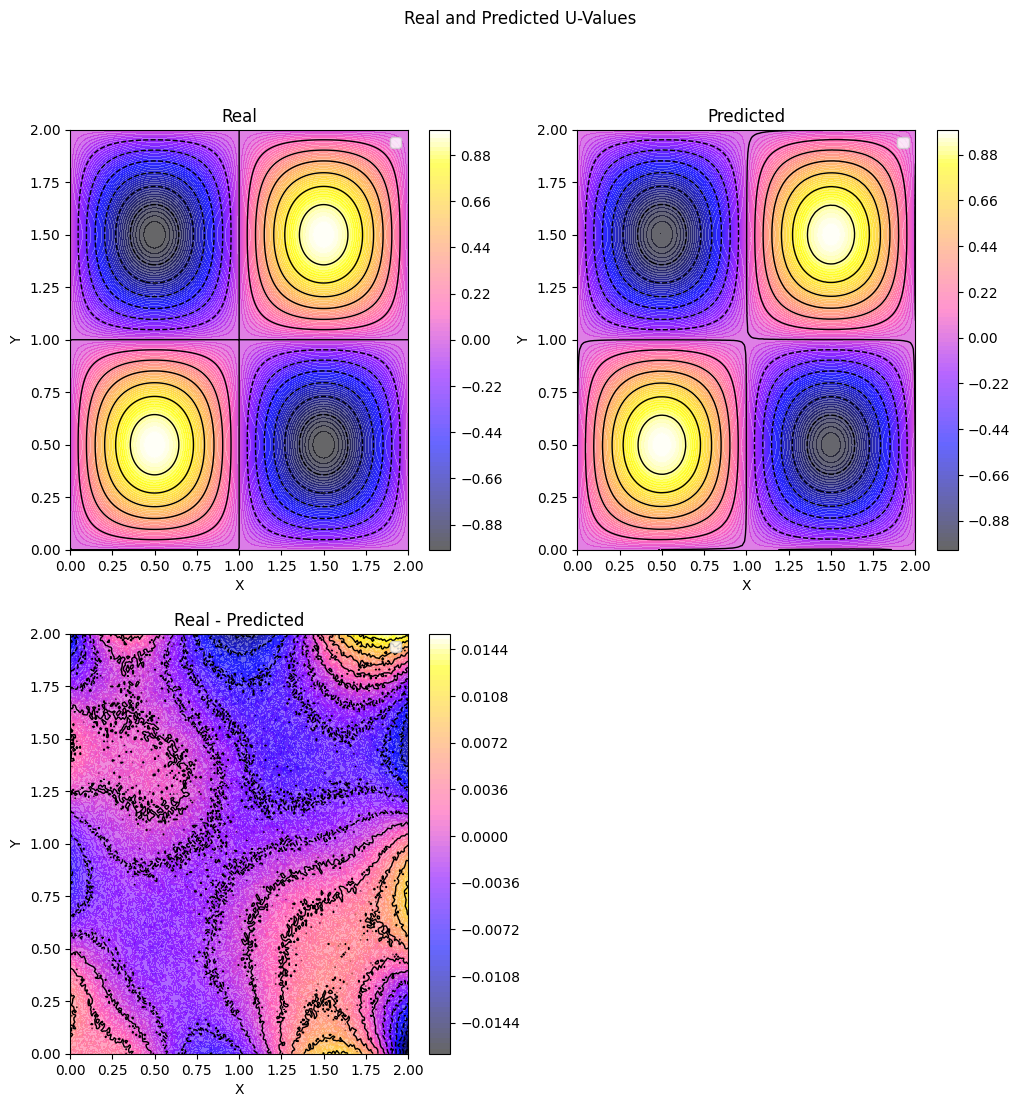

In [37]:
plotter.plot2d_contour(color_map="gnuplot2")